<a href="https://colab.research.google.com/github/Eitan007/pytorch/blob/main/pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
2+2

4

In [52]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.14.0.32.55
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread      

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [54]:
class Model(nn.Module):
  # Input layer (4 features of the flower)
  # Hidden layers (number of neurons)
  # output layer (3 classes of flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [55]:
# pick a manual seed
torch.manual_seed(41)

# create an instance of model
model = Model()

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [58]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [59]:
# change last column from strings to numbers
my_df["species"] = my_df["species"].replace('setosa', 0.0)
my_df["species"] = my_df["species"].replace('versicolor', 1.0)
my_df["species"] = my_df["species"].replace('virginica', 2.0)
my_df

<ipython-input-59-7f44256ecb90>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df["species"] = my_df["species"].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [60]:
# split the feature data from the output data ie set X and y
X = my_df.drop("species", axis=1)
y = my_df["species"]

In [61]:
X = X.values
y = y.values

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [63]:
# convert train and test samples to the pytorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [64]:
# set the criterion of model to measure error
criterion = nn.CrossEntropyLoss()
#choose Adam Optimizer, lr = learning rate, IF ERRORS DON'T GO DOWN, WE REDUCE OUR LEARNING RATE
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [65]:
# Train model
epochs = 100
losses = []

for i in range(epochs):
  # send data thru network get prediction
  y_pred = model.forward(X_train)
  # compare prediction to actual value
  loss = criterion(y_pred, y_train)
  # append variation (loss) to losses list
  losses.append(loss.detach().numpy())

  # print every 10  epochs
  if i % 10 == 0:
    print(f"Epoch: {i} Loss: {loss}")

  # back propagate the error
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.1251550912857056
Epoch: 10 Loss: 1.0096259117126465
Epoch: 20 Loss: 0.8157405853271484
Epoch: 30 Loss: 0.585706353187561
Epoch: 40 Loss: 0.3999636471271515
Epoch: 50 Loss: 0.2676880657672882
Epoch: 60 Loss: 0.17942363023757935
Epoch: 70 Loss: 0.12151690572500229
Epoch: 80 Loss: 0.0860118418931961
Epoch: 90 Loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

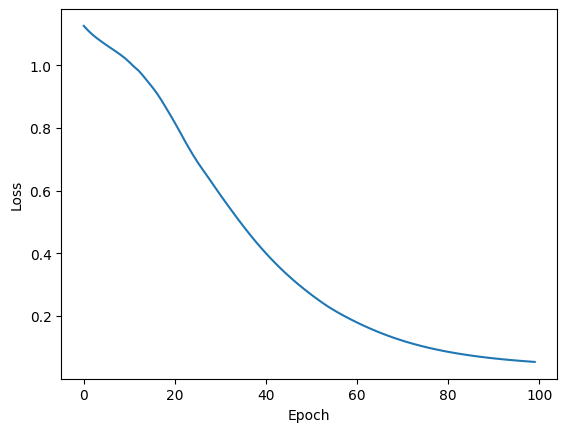

In [66]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [67]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

print(f"Loss: {loss}")

Loss: 0.13151270151138306


In [68]:
loss

tensor(0.1315)

In [69]:
# use to count how many correct predictions
correct = 0

# prevent back prop
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # print simpler output
    if y_test[1] == 0:
      x = "setosa"
    elif y_test[1] == 0:
      x = "versicolor"
    else:
      x = "virginica"

    # tabulate the correct and incorrect predictions
    print(f"{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}")

    # count correct predictions
    if y_val.argmax().item() == y_test[i]:
      correct += 1

# print correct predictions
print(f"We got {correct} correct")

1.) tensor([-5.8760,  4.4628,  6.5124]) 	 virginica 	 2
2.) tensor([-7.5436,  4.1670,  9.7255]) 	 virginica 	 2
3.) tensor([-8.4504,  5.1271, 10.1987]) 	 virginica 	 2
4.) tensor([-4.3398,  5.6267,  2.5608]) 	 virginica 	 1
5.) tensor([-7.1825,  4.8754,  8.2992]) 	 virginica 	 2
6.) tensor([-3.3974,  5.3463,  1.2803]) 	 virginica 	 1
7.) tensor([-5.9231,  4.9822,  5.9997]) 	 virginica 	 2
8.) tensor([-4.2881,  5.7003,  2.3889]) 	 virginica 	 1
9.) tensor([-6.5356,  4.9257,  7.1260]) 	 virginica 	 2
10.) tensor([-8.0509,  4.4129, 10.3286]) 	 virginica 	 2
11.) tensor([-5.6762,  4.9500,  5.6215]) 	 virginica 	 2
12.) tensor([ 4.5662, -2.2476, -2.8911]) 	 virginica 	 0
13.) tensor([ 4.2571, -1.9967, -2.7330]) 	 virginica 	 0
14.) tensor([-2.1108,  4.0515,  0.5799]) 	 virginica 	 1
15.) tensor([ 3.4575, -1.2098, -2.3514]) 	 virginica 	 0
16.) tensor([-5.4724,  5.1165,  5.0934]) 	 virginica 	 1
17.) tensor([ 4.0557, -1.7949, -2.6492]) 	 virginica 	 0
18.) tensor([-5.8075,  4.6053,  6.2458])

In [74]:
# SAMPLE
# add new data to the network to predict
# new data
new_iris = torch.tensor([5.9, 3.0, 5.1, 1.0])

#predict then print
with torch.no_grad():
  print(model(new_iris))

tensor([-4.2248,  5.2388,  2.8371])
